# Import

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ToBigs/01. EDA_GIT/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# EDA

### 결측치 확인하기 -> 결측치 없음

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 이상치 확인 -> 이상치 총 209개 -> 이상치 제거

In [ ]:
# 이상치 탐지 FUNC 설정
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers
num_col = df.select_dtypes(exclude= object).columns.tolist() # 수치형 column
df_cleaned = df.drop(detect_outliers(df, 1, num_col))

print("이상치 제거 이전 데이터의 수:", len(df))
print("이상치 1개 이상인 데이터의 수:", len(detect_outliers(df, 1, num_col)))
print("이상치 제거 이후 데이터의 수:", len(df_cleaned))

이상치 제거 이전 데이터의 수: 1470
이상치 1개 이상인 데이터의 수: 209
이상치 제거 이후 데이터의 수: 1261


### feature selection

In [ ]:
# 각 수치형 value unique 확인
num_col = df_cleaned.select_dtypes(exclude= object).columns.tolist() # 수치형 column
for each_col in num_col:
  print(f"============ {each_col} =============")
  each_unique = df_cleaned[each_col]
  if len(set(each_unique)) < 30:
    print(df_cleaned[each_col].value_counts())
  else:
    print("too many unique values")

============ Age =============
too many unique values
============ DailyRate =============
too many unique values
============ DistanceFromHome =============
1     176
2     171
9      76
3      75
10     74
8      71
7      68
5      63
4      55
6      54
16     30
11     28
29     25
24     24
18     23
20     22
19     20
17     20
25     20
23     20
15     20
26     19
13     18
22     16
28     16
12     16
14     16
21     15
27     10
Name: DistanceFromHome, dtype: int64
============ Education =============
3    492
4    337
2    249
1    143
5     40
Name: Education, dtype: int64
============ EmployeeCount =============
1    1261
Name: EmployeeCount, dtype: int64
============ EmployeeNumber =============
too many unique values
============ EnvironmentSatisfaction =============
4    389
3    387
2    247
1    238
Name: EnvironmentSatisfaction, dtype: int64
============ HourlyRate =============
too many unique values
============ JobInvolvement =============
3    750
2    317
4

In [ ]:
# 각 범주형 변수의 value unique 확인
cat_col = df_cleaned.select_dtypes(include= object).columns.tolist() # 범주형 column
for each_col in cat_col:
  print(f"============ {each_col} =============")
  each_unique = df_cleaned[each_col]
  if len(set(each_unique)) < 30:
    print(df_cleaned[each_col].value_counts())
  else:
    print("too many unique values")

============ Attrition =============
No     1051
Yes     210
Name: Attrition, dtype: int64
============ BusinessTravel =============
Travel_Rarely        896
Travel_Frequently    240
Non-Travel           125
Name: BusinessTravel, dtype: int64
============ Department =============
Research & Development    822
Sales                     387
Human Resources            52
Name: Department, dtype: int64
============ EducationField =============
Life Sciences       525
Medical             382
Marketing           141
Technical Degree    118
Other                74
Human Resources      21
Name: EducationField, dtype: int64
============ Gender =============
Male      765
Female    496
Name: Gender, dtype: int64
============ JobRole =============
Sales Executive              293
Research Scientist           272
Laboratory Technician        244
Manufacturing Director       127
Healthcare Representative    108
Sales Representative          78
Human Resources               50
Research Director     

값이 한개인 feature들 제거 : 'EmployeeCount', 'StandardHours', 'Over18'

Employee Number 모두 다른 값으로 제거 : 'EmployeeNumber'

In [ ]:
print("컬럼 드랍 전 shape: ", df_cleaned.shape)
drop_col = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df_cleaned = df_cleaned.drop(drop_col, axis=1)
print("컬럼 드랍 후 shape: ", df_cleaned.shape)

컬럼 드랍 전 shape:  (1261, 35)
컬럼 드랍 후 shape:  (1261, 31)


In [ ]:
df_cleaned.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1261 non-null   int64 
 1   Attrition                 1261 non-null   object
 2   BusinessTravel            1261 non-null   object
 3   DailyRate                 1261 non-null   int64 
 4   Department                1261 non-null   object
 5   DistanceFromHome          1261 non-null   int64 
 6   Education                 1261 non-null   int64 
 7   EducationField            1261 non-null   object
 8   EnvironmentSatisfaction   1261 non-null   int64 
 9   Gender                    1261 non-null   object
 10  HourlyRate                1261 non-null   int64 
 11  JobInvolvement            1261 non-null   int64 
 12  JobLevel                  1261 non-null   int64 
 13  JobRole                   1261 non-null   object
 14  JobSatisfaction         

#### Binary 0과 1 수치형으로 변환

In [ ]:
#df_cleaned['Attrition'] = df_cleaned['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
num_col = df_cleaned.select_dtypes(exclude= object).columns.tolist() # 수치형 column + attrition
df_cleaned.head()
y = df_cleaned['Attrition']
X = df_cleaned.drop('Attrition', axis=1)

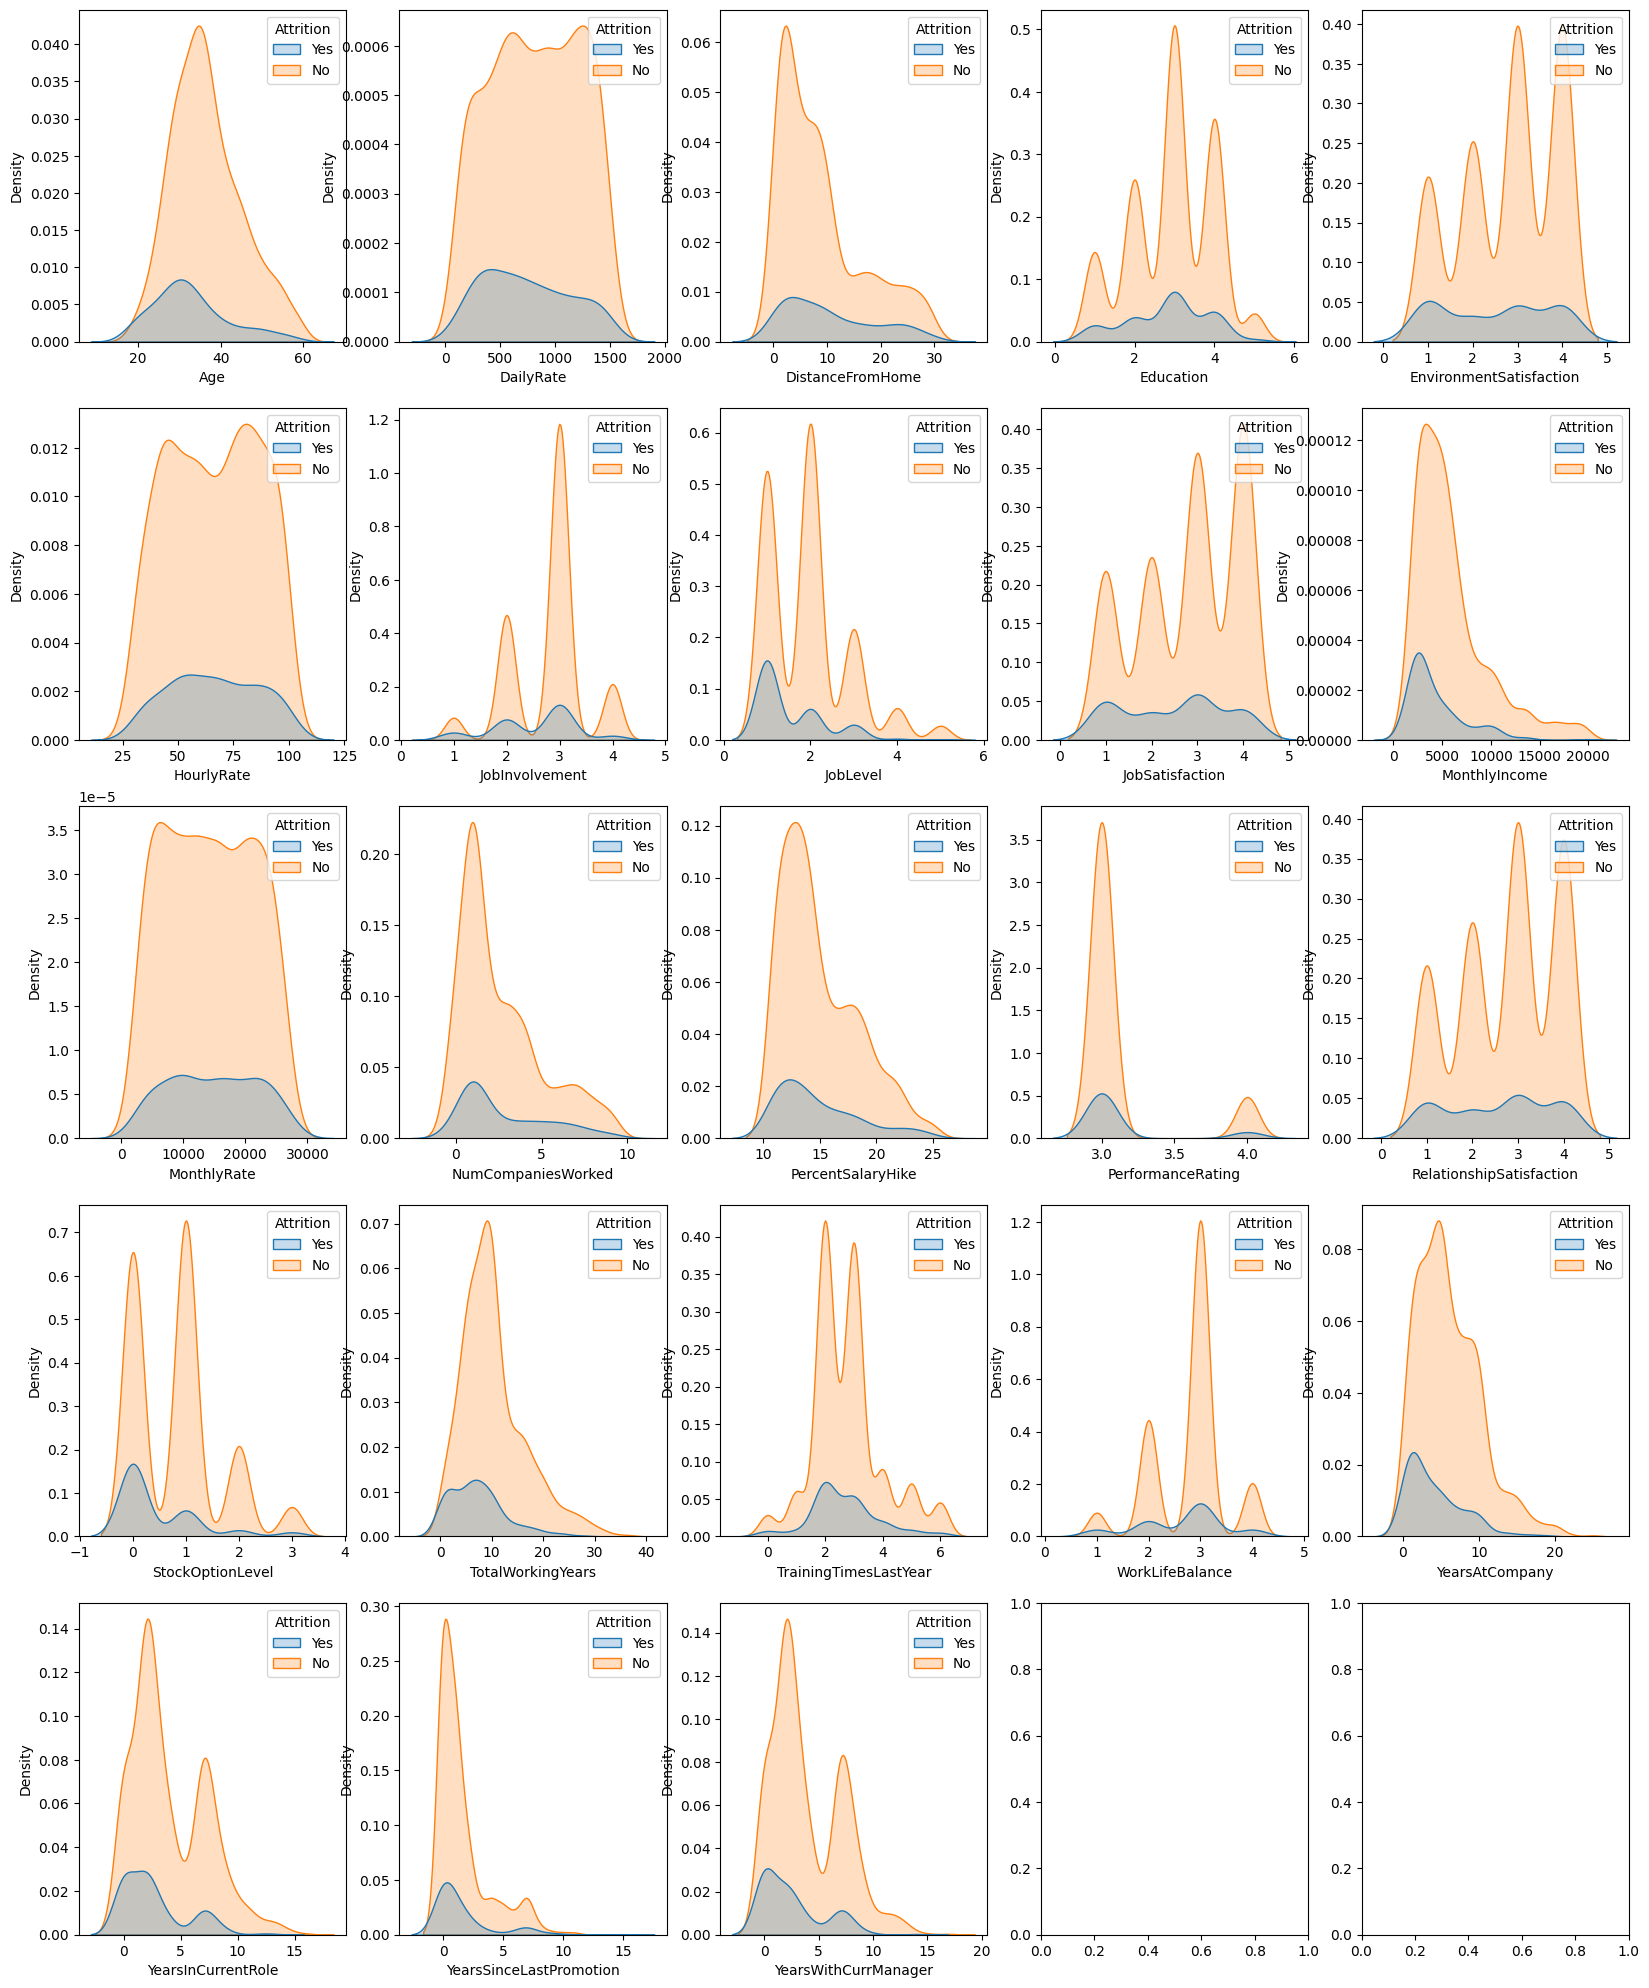

In [ ]:
fig, ax = plt.subplots(5, 5, figsize = (20, 5*5))
for i, col in enumerate(num_col):
    if col == 'Attrition':
      continue
    else:
      sns.kdeplot(data = df_cleaned, x = col, fill = True, ax = ax[i // 5][i % 5], hue = y)

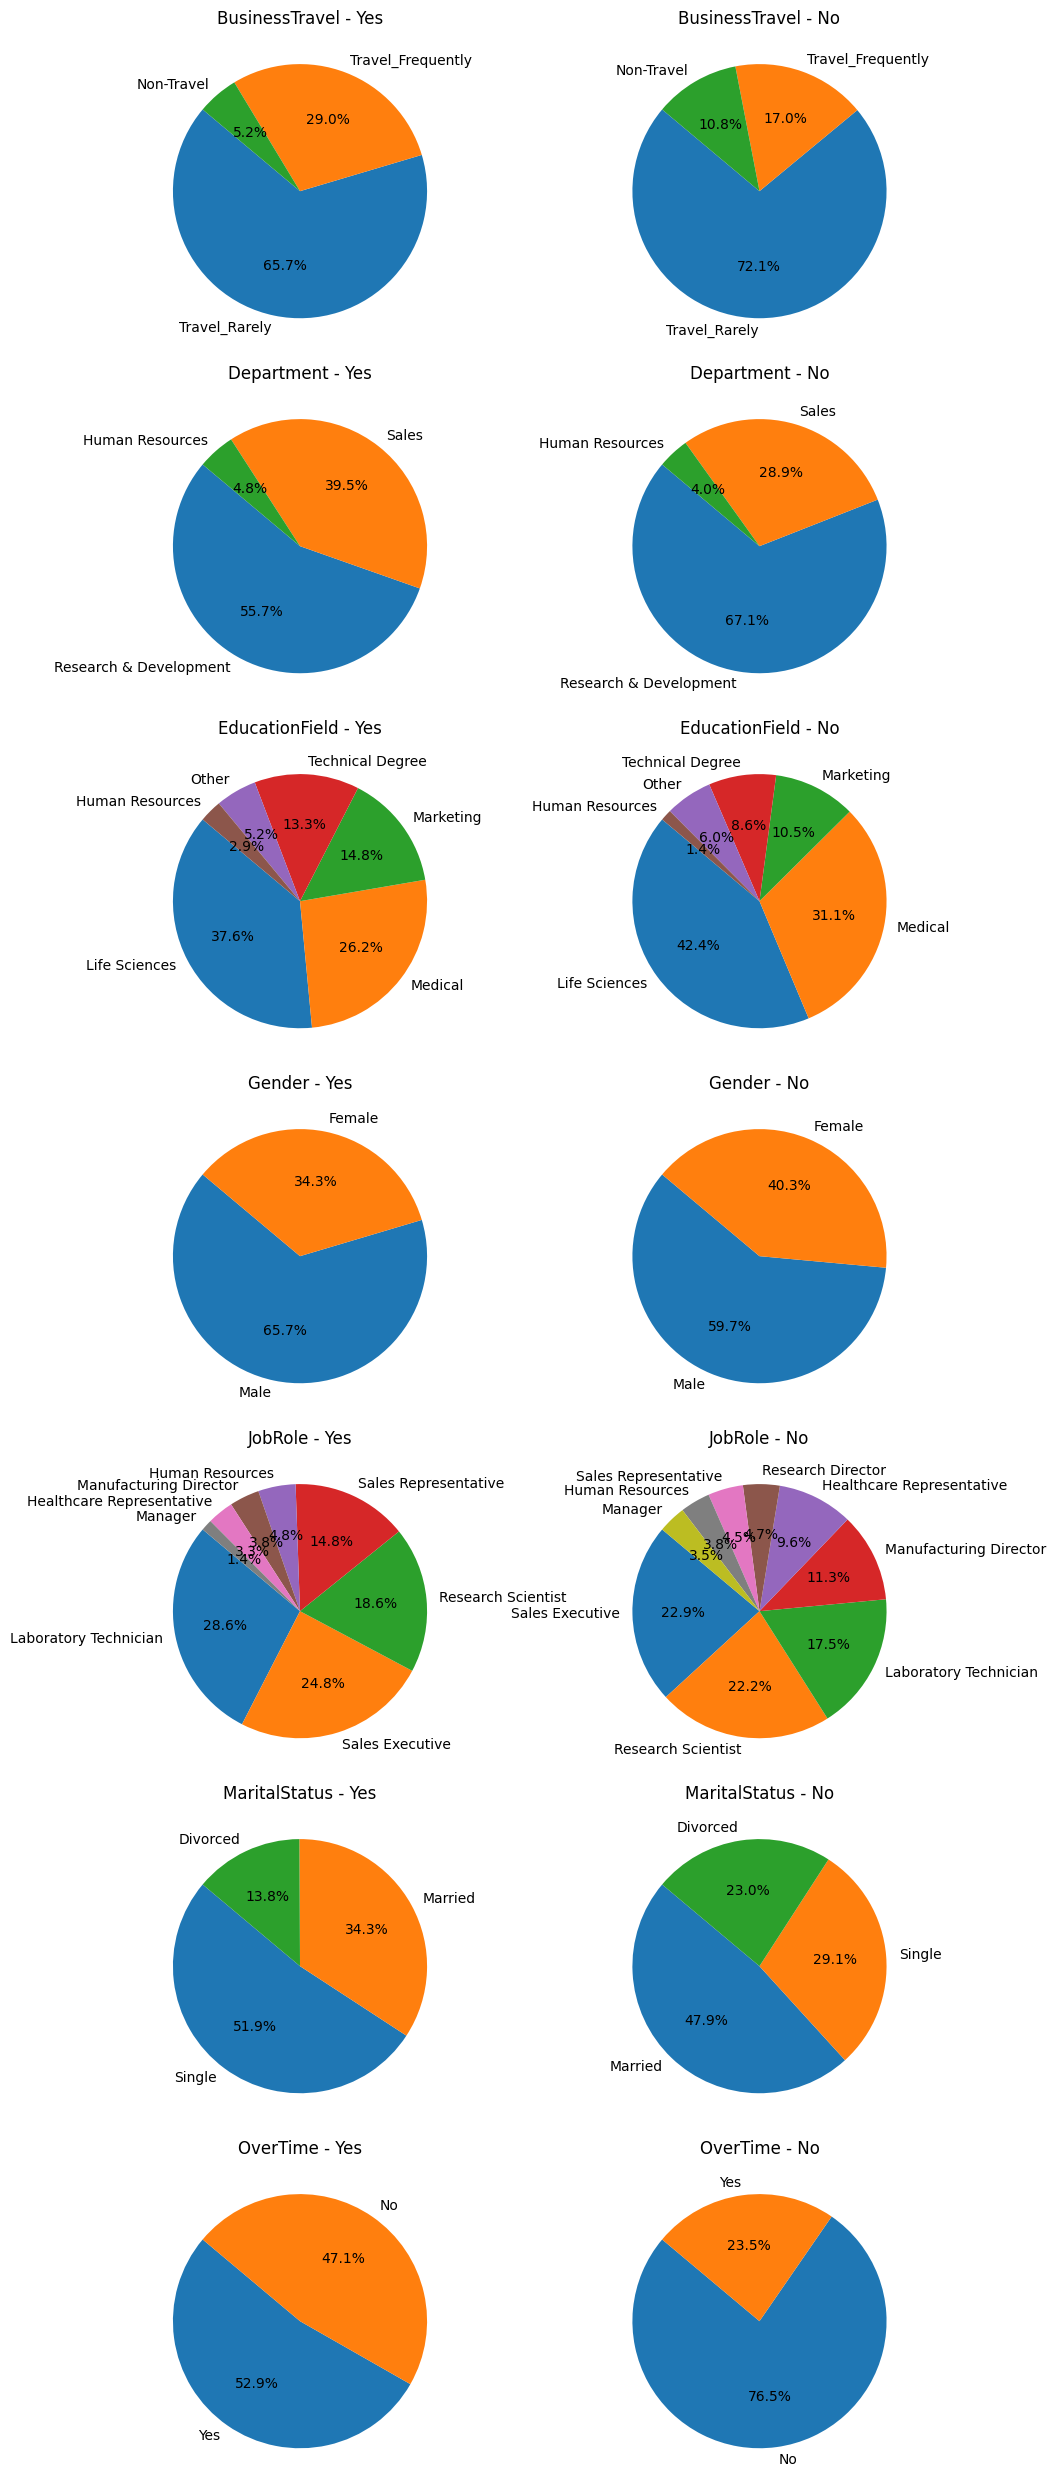

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame, cat_cols is a list of categorical columns, and target is your target column
cat_cols = [col for col in df_cleaned.columns if df_cleaned[col].dtype == 'object' and col != 'Attrition']

# Number of rows and columns for the subplot
n_rows = len(cat_cols)
n_cols = 2  # Since you have two target values: 'yes' and 'no'

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 5*5))

for i, col in enumerate(cat_cols):
    for j, target_value in enumerate(['Yes', 'No']):
        # Filter the DataFrame based on the target value
        filtered_df = df_cleaned[y == target_value]

        # Get the value counts of the current categorical column
        values = filtered_df[col].value_counts(normalize=True)

        # Create a pie chart
        ax[i, j].pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
        ax[i, j].set_title(f'{col} - {target_value}')

plt.tight_layout()
plt.show()


### 상관계수 확인

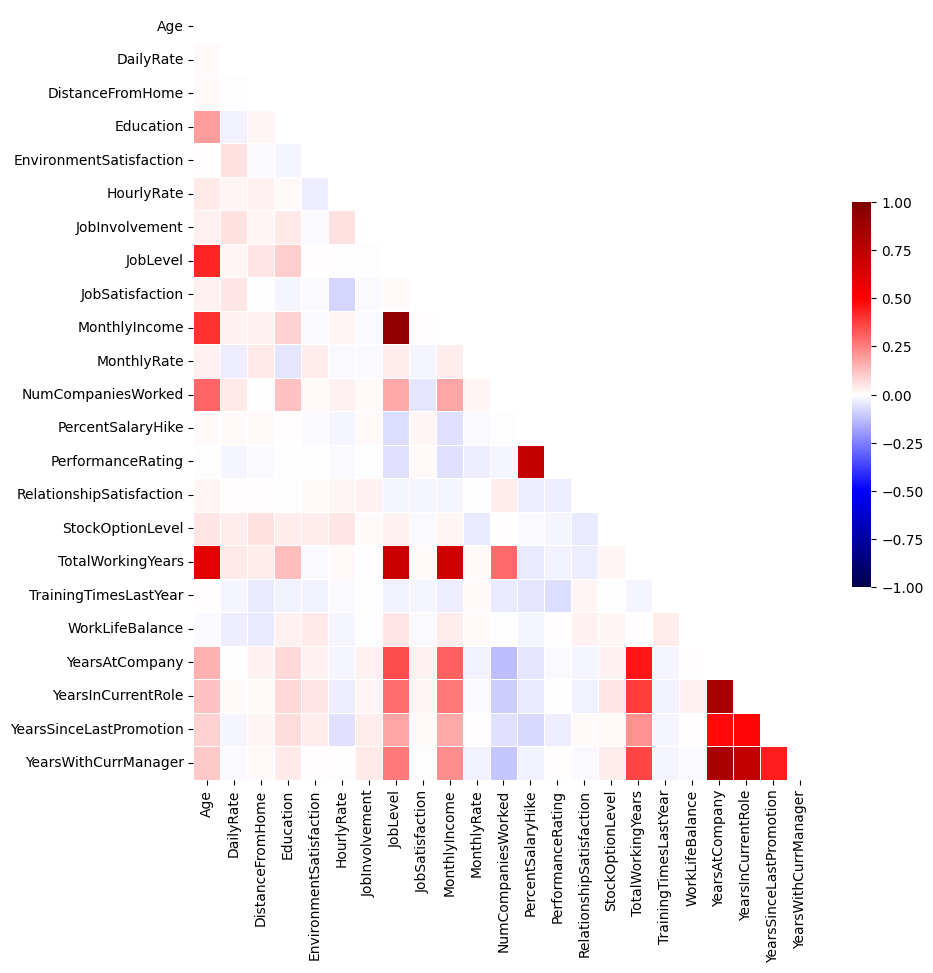

In [ ]:
df_cleaned_corr = df_cleaned[num_col].corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_cleaned_corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_cleaned_corr,
            cmap = 'seismic',
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()

### 파생변수

현재 회사가 첫 회사인지 확인하는 변수 생성

In [ ]:
df_cleaned['firstcompany'] = (df_cleaned['YearsAtCompany'] == df_cleaned['TotalWorkingYears']).astype(int) # False 0, True 1
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,firstcompany
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,0
